In [38]:
parent_folder = "D:/Data-analysis/my_spotify_data/Spotify Extended Streaming History/"

file_name = "Streaming_History_Audio_*.json"

In [39]:
import pandas as pd
import glob

df = pd.DataFrame()

for file in glob.glob(parent_folder+file_name):
    temp = pd.read_json(file)
    df = pd.concat([df, temp])

In [44]:
print(df.shape)
df

(42212, 21)


,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2021-10-22 09:08:45+05:30,34tbta7ykj2w4ccz5pdsjtn0b,"Android OS 9 API 28 (Xiaomi, Redmi Note 5 Pro)",33427,IN,103.134.167.136,unknown,내 맘을 볼 수 있나요,HEIZE,Hotel del Luna (Original Television Soundtrack...,...,None,None,None,clickrow,endplay,False,NaN,False,1634873890868,False
1,2021-10-22 09:09:12+05:30,34tbta7ykj2w4ccz5pdsjtn0b,"Android OS 9 API 28 (Xiaomi, Redmi Note 5 Pro)",26026,IN,103.134.167.136,unknown,None,None,None,...,Still With You by JK,celeste,spotify:episode:7IFJwsFslfS7hdKAxaMiTU,clickrow,endplay,False,NaN,False,1634873925090,False
2,2021-10-22 09:37:12+05:30,34tbta7ykj2w4ccz5pdsjtn0b,"Android OS 9 API 28 (Xiaomi, Redmi Note 5 Pro)",25492,IN,103.134.167.136,unknown,내 맘을 볼 수 있나요,HEIZE,Hotel del Luna (Original Television Soundtrack...,...,None,None,None,clickrow,logout,False,NaN,False,1634873951923,False
3,2021-10-22 12:35:47+05:30,34tbta7ykj2w4ccz5pdsjtn0b,"Android OS 9 API 28 (Xiaomi, Redmi Note 5 Pro)",26953,IN,103.134.167.136,unknown,내 맘을 볼 수 있나요,HEIZE,Hotel del Luna (Original Television Soundtrack...,...,None,None,None,appload,unexpected-exit-while-paused,False,NaN,False,1634875630887,False
4,2021-10-22 13:09:04+05:30,34tbta7ykj2w4ccz5pdsjtn0b,"Android OS 9 API 28 (Xiaomi, Redmi Note 5 Pro)",197580,IN,103.134.167.136,unknown,내 맘을 볼 수 있나요,HEIZE,Hotel del Luna (Original Television Soundtrack...,...,None,None,None,appload,trackdone,False,NaN,False,1634888118296,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,2024-11-05 22:02:09+05:30,34tbta7ykj2w4ccz5pdsjtn0b,android,23041,IN,103.134.166.212,unknown,Die For You,Joji,SMITHEREENS,...,None,None,None,fwdbtn,endplay,True,1.0,False,1730824307,False
9596,2024-11-05 22:04:30+05:30,34tbta7ykj2w4ccz5pdsjtn0b,android,141093,IN,103.134.166.212,unknown,YUKON (INTERLUDE),Joji,SMITHEREENS,...,None,None,None,clickrow,endplay,False,1.0,False,1730824330,False
9597,2024-11-05 22:05:46+05:30,34tbta7ykj2w4ccz5pdsjtn0b,android,74259,IN,103.134.166.212,unknown,Glimpse of Us,Joji,SMITHEREENS,...,None,None,None,trackdone,logout,False,0.0,False,1730824471,False
9598,2024-11-05 22:30:26+05:30,34tbta7ykj2w4ccz5pdsjtn0b,android,73884,IN,103.134.166.212,unknown,Kiya Kiya,Anand Raj Anand,Welcome (Original Motion Picture Soundtrack),...,None,None,None,clickrow,unexpected-exit-while-paused,False,0.0,False,1730825952,False


Covert to timestamp

In [43]:
df['ts'] = pd.to_datetime(df['ts'], format="%Y-%m-%dT%H:%M:%SZ", utc=True)

import pytz
my_tz = pytz.timezone("Asia/Kolkata")
df['ts'] = df['ts'].dt.tz_convert(my_tz)
df.sort_values(by='ts', inplace=True)

Extract the year

In [45]:
df['year'] = df['ts'].dt.year
df[['ts', 'year']]

,ts,year
0,2021-10-22 09:08:45+05:30,2021
1,2021-10-22 09:09:12+05:30,2021
2,2021-10-22 09:37:12+05:30,2021
3,2021-10-22 12:35:47+05:30,2021
4,2021-10-22 13:09:04+05:30,2021
...,...,...
9595,2024-11-05 22:02:09+05:30,2024
9596,2024-11-05 22:04:30+05:30,2024
9597,2024-11-05 22:05:46+05:30,2024
9598,2024-11-05 22:30:26+05:30,2024


In [59]:
df[df['year']==2024].groupby('master_metadata_album_artist_name')['master_metadata_album_artist_name'].count().sort_values(ascending=False)

# Check the first few rows of your DataFrame to understand its structure
print(df.head())

# Check column names and data types
print(df.info())

                         ts                   username  \
0 2021-10-22 09:08:45+05:30  34tbta7ykj2w4ccz5pdsjtn0b   
1 2021-10-22 09:09:12+05:30  34tbta7ykj2w4ccz5pdsjtn0b   
2 2021-10-22 09:37:12+05:30  34tbta7ykj2w4ccz5pdsjtn0b   
3 2021-10-22 12:35:47+05:30  34tbta7ykj2w4ccz5pdsjtn0b   
4 2021-10-22 13:09:04+05:30  34tbta7ykj2w4ccz5pdsjtn0b   

                                         platform  ms_played conn_country  \
0  Android OS 9 API 28 (Xiaomi, Redmi Note 5 Pro)      33427           IN   
1  Android OS 9 API 28 (Xiaomi, Redmi Note 5 Pro)      26026           IN   
2  Android OS 9 API 28 (Xiaomi, Redmi Note 5 Pro)      25492           IN   
3  Android OS 9 API 28 (Xiaomi, Redmi Note 5 Pro)      26953           IN   
4  Android OS 9 API 28 (Xiaomi, Redmi Note 5 Pro)     197580           IN   

  ip_addr_decrypted user_agent_decrypted master_metadata_track_name  \
0   103.134.167.136              unknown               내 맘을 볼 수 있나요   
1   103.134.167.136              unknown      

Top 10 most played songs

In [60]:
top_songs_count = df['master_metadata_track_name'].value_counts().reset_index()

# Rename the columns for clarity
top_songs_count.columns = ['ms_played', 'play_count']

# Show top 10 most played songs
print(top_songs_count.head(10))

            ms_played  play_count
0         Die For You         355
1   YUKON (INTERLUDE)         270
2            Daylight         247
3  Stargirl Interlude         237
4           Satellite         223
5          Doin' Time         214
6       Brooklyn Baby         195
7     Love Of My Life         193
8       Glimpse of Us         190
9           As It Was         184


Listening Trends Over Time

Monthly Trends

C:\Users\tango\AppData\Local\Temp\ipykernel_8208\3948452311.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['ts'].dt.to_period('M')


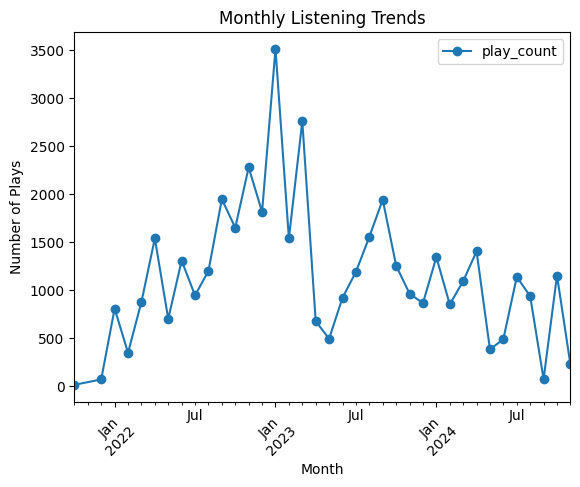

In [53]:
# Extract year and month from the timestamp
df['year_month'] = df['ts'].dt.to_period('M')

# Group by the year and month and count the number of plays
monthly_trends = df.groupby('year_month').size().reset_index(name='play_count')

# Plot the trends
import matplotlib.pyplot as plt
monthly_trends.plot(x='year_month', y='play_count', kind='line', marker='o', title='Monthly Listening Trends')
plt.xlabel('Month')
plt.ylabel('Number of Plays')
plt.xticks(rotation=45)
plt.show()


 Top Albums


In [54]:
# Group by album and sum total playtime
top_albums = df.groupby('master_metadata_album_album_name')['ms_played'].sum().reset_index()

# Sort by total playtime
top_albums_sorted = top_albums.sort_values(by='ms_played', ascending=False)

# Display top 10 albums
print(top_albums_sorted.head(10))


     master_metadata_album_album_name  ms_played
1481                    Harry's House  129487398
2496                           Nectar  121756037
3026                      SMITHEREENS  110020517
2565         Norman Fucking Rockwell!   89263220
1136     Faith In The Future (Deluxe)   76502605
2562              Nobody Is Listening   73770838
1695                     Icarus Falls   69341514
3915                            Walls   56951940
1180                        Fine Line   56232530
3827                    Ultraviolence   55698947


Skip Rate

In [55]:
# Calculate the skip rate (percentage of songs skipped)
skip_rate = df['skipped'].notna().mean()  # Calculate the proportion of skipped songs

print(f"Skip rate: {skip_rate * 100:.2f}%")


Skip rate: 74.87%


Listen Time vs. Skipping Behavior

In [57]:
# Create a column to check if a song was skipped or not
df['skipped'] = df['skipped'].fillna(0)  # Replace NaN with 0 (assuming NaN means it wasn't skipped)

# Calculate the average 'ms_played' for skipped vs non-skipped songs
skipped_vs_not = df.groupby('skipped')['ms_played'].mean().reset_index()

# Display the results
print(skipped_vs_not)

   skipped      ms_played
0      0.0  132802.403441
1      1.0   19018.196963


Listening Trends Over Time

Hourly Trends

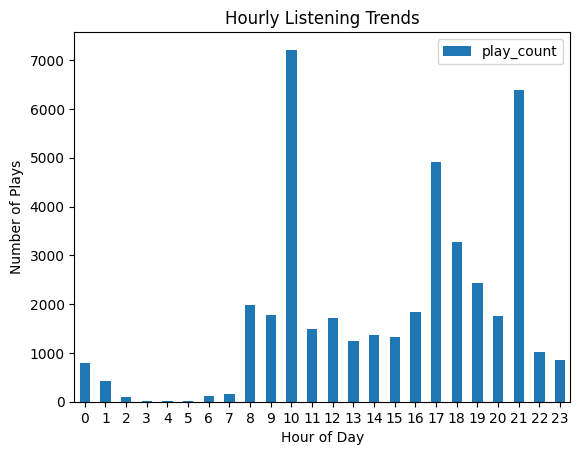

In [58]:
# Extract hour from the timestamp
df['hour'] = df['ts'].dt.hour

# Group by the hour and count the number of plays
hourly_trends = df.groupby('hour').size().reset_index(name='play_count')

# Plot the hourly trends
hourly_trends.plot(x='hour', y='play_count', kind='bar', title='Hourly Listening Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Plays')
plt.xticks(rotation=0)
plt.show()
